In [1]:
%load_ext ipydex.displaytools

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.interactive import printing
printing.init_printing()
from sympy import sin, cos, exp
import symbtools as st
from ipywidgets import interact, interactive, fixed, interact_manual

# Aufgabe: Visualisierung von Taylor-Polynomen verschiedener Ordnung



<div style="font-size:150%;">

Geg:

- $f(x) = \sin(ax)$


Ges:

- grafische Darstellung von $\hat f_k(x; x_0) := \sum_{i=0}^k\frac{1}{k!}\left.\frac{d^k}{dx^k} f(x)\right|_{x=x_0}$
    
</div>

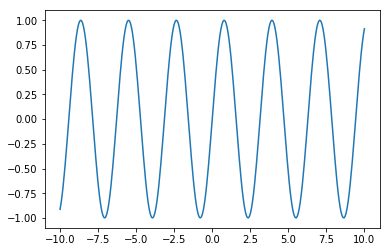

In [2]:
x, x0, a = sp.symbols("x, x0, a")

f1 = sin(a*x)# *f1
func1 = st.expr_to_func((a, x), f1)


xx_values = np.linspace(-10, 10, 300)

a1 = 2
plt.plot(xx_values, func1(a1, xx_values))

In [3]:
# Vorabbrechnung der Taylor-Approximationen

taylor_expressions = []
taylor_funcs = []

Nmax = 12

for i in range(Nmax + 1):
    # taylor_expr = sp.series(f2, x, x0, n=i)
    taylor_expr = st.multi_taylor(f1, (x,), (x0, ), order=i)
    taylor_expressions.append(taylor_expr)
    taylor_funcs.append(st.expr_to_func((a, x, x0), taylor_expr.removeO()))

In [4]:
a, x

In [5]:
@interact(n=(0, Nmax, 1), x01=(-5, 5, 0.2), a1=(0.0, 1, 0.01))
def plot_func(n, x01, a1):
    plt.figure(figsize=(12, 6))
    plt.plot(xx_values, func1(a1, xx_values), "b-", lw=3)
    plt.plot(xx_values, taylor_funcs[n](a1, xx_values, x01), "r")
    plt.plot([x01], func1(a1, x01), "ro")
    plt.axis([-10, 10, -1.3, 1.3])
    # approx = taylor_expressions[n].subs(x0, x01) ##:

interactive(children=(IntSlider(value=6, description='n', max=12), FloatSlider(value=0.0, description='x01', max=5.0, min=-5.0, step=0.2), FloatSlider(value=0.5, description='a1', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))


<br><br><br><br><br><br><br><br><br><br><br><br><br>

<br><br><br><br><br><br><br><br><br><br><br><br><br>


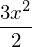

---


In [7]:
F = sp.integrate(3*x, x ) ##:

F.subs(x, 1) - F.subs(x, 0)
